In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import iaml01cw2_my_helpers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib.pyplot import MultipleLocator
from sklearn.model_selection import cross_val_score

In [2]:
def iaml01cw2_q2_1():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    lr = LogisticRegression()
    lr.fit(Xtrn_nm,Ytrn)
    prediction = lr.predict(Xtst_nm)
    print(accuracy_score(Ytst,prediction))
    print(pd.DataFrame(data=confusion_matrix(Ytst,prediction)))
    return

iaml01cw2_q2_1()

0.8401
     0    1    2    3    4    5    6    7    8    9
0  819    3   15   50    7    4   89    1   12    0
1    5  953    4   27    5    0    3    1    2    0
2   27    4  731   11  133    0   82    2    9    1
3   31   15   14  866   33    0   37    0    4    0
4    0    3  115   38  760    2   72    0   10    0
5    2    0    0    1    0  911    0   56   10   20
6  147    3  128   46  108    0  539    0   28    1
7    0    0    0    0    0   32    0  936    1   31
8    7    1    6   11    3    7   15    5  945    0
9    0    0    0    1    0   15    1   42    0  941


In [3]:
def iaml01cw2_q2_2():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    clr = SVC()
    clr.fit(Xtrn_nm,Ytrn)
    prediction = clr.predict(Xtst_nm)
    print(accuracy_score(Ytst,prediction))
    print(pd.DataFrame(data=confusion_matrix(Ytst,prediction)))
    return

iaml01cw2_q2_2()

0.8461
     0    1    2    3    4    5    6    7    8    9
0  845    2    8   51    4    4   72    0   14    0
1    4  951    7   31    5    0    1    0    1    0
2   15    2  748   11  137    0   79    0    8    0
3   32    6   12  881   26    0   40    0    3    0
4    1    0   98   36  775    0   86    0    4    0
5    0    0    0    1    0  914    0   57    2   26
6  185    1  122   39   95    0  533    0   25    0
7    0    0    0    0    0   34    0  925    0   41
8    3    1    8    5    2    4   13    4  959    1
9    0    0    0    0    0   22    0   47    1  930


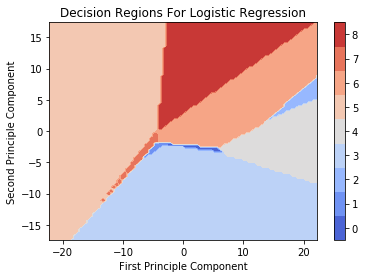

In [4]:
def iaml01cw2_q2_3():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(n_components=2,random_state=1)
    pca.fit(Xtrn_nm)
    std1 = np.sqrt(pca.explained_variance_[0])
    std2 = np.sqrt(pca.explained_variance_[1])
    x = np.linspace(-5*std1,5*std1,100)
    y = np.linspace(-5*std2,5*std2,100)
    xx, yy = np.meshgrid(x, y)
    plane_values = np.c_[xx.ravel(), yy.ravel()]
    origin_values = pca.inverse_transform(plane_values)
    lr = LogisticRegression()
    lr.fit(Xtrn_nm,Ytrn)
    labels = lr.predict(origin_values)
    labels = labels.reshape(100,100)
    plt.contourf(xx, yy, labels, cmap="coolwarm", levels=np.arange(-1,9))
    plt.xlabel("First Principle Component")
    plt.ylabel("Second Principle Component")
    plt.title("Decision Regions For Logistic Regression")
    cb = plt.colorbar()
    cb.set_ticks(np.arange(-0.5,9.5))
    cb.set_ticklabels(np.arange(0,9))
    plt.savefig("plot/DR1.pdf", bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q2_3()

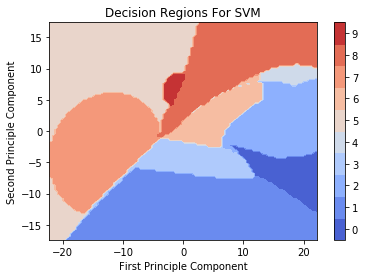

In [5]:
def iaml01cw2_q2_4():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(n_components=2,random_state=1)
    pca.fit(Xtrn_nm)
    std1 = np.sqrt(pca.explained_variance_[0])
    std2 = np.sqrt(pca.explained_variance_[1])
    x = np.linspace(-5*std1,5*std1,100)
    y = np.linspace(-5*std2,5*std2,100)
    xx, yy = np.meshgrid(x, y)
    plane_values = np.c_[xx.ravel(), yy.ravel()]
    origin_values = pca.inverse_transform(plane_values)
    clr = SVC()
    clr.fit(Xtrn_nm,Ytrn)
    labels = clr.predict(origin_values)
    labels = labels.reshape(100,100)
    plt.contourf(xx, yy, labels, cmap="coolwarm", levels=np.arange(-1,10))
    plt.xlabel("First Principle Component")
    plt.ylabel("Second Principle Component")
    plt.title("Decision Regions For SVM")
    cb = plt.colorbar()
    cb.set_ticks(np.arange(-0.5,10.5))
    cb.set_ticklabels(np.arange(0,10))
    plt.savefig("plot/DR2.pdf", bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q2_4()

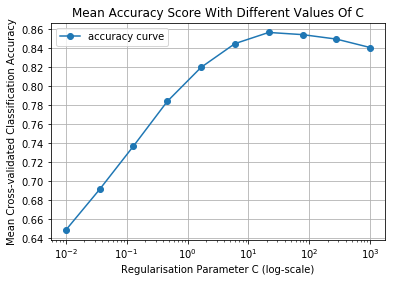

21.544346900318846
0.8565023106939273


In [6]:
def iaml01cw2_q2_5():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    Xsmall, Ysmall = Xtrn_nm[Ytrn==0][:1000], Ytrn[Ytrn==0][:1000]
    for i in range(1,10):
        sub_x_data = Xtrn_nm[Ytrn==i][:1000]
        sub_y_data = Ytrn[Ytrn==i][:1000]
        Xsmall = np.concatenate((Xsmall,sub_x_data),axis=0)
        Ysmall = np.concatenate((Ysmall,sub_y_data),axis=0) 
    scores_list = []
    for j in np.logspace(-2,3,10):
        svc = SVC(C=j,kernel="rbf",gamma="auto")
        scores = cross_val_score(svc, Xsmall, Ysmall, cv=3, n_jobs=-1, scoring='accuracy')
        scores_list.append(scores.mean())
    plt.plot(np.logspace(-2,3,10),scores_list,"o-",label="accuracy curve")
    plt.xlabel("Regularisation Parameter C (log-scale)")
    plt.ylabel("Mean Cross-validated Classification Accuracy")
    plt.title("Mean Accuracy Score With Different Values Of C")
    plt.xscale('log')
    y_major_locator = MultipleLocator(0.02)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)
    plt.grid()
    plt.legend()
    plt.savefig("plot/MASC.pdf", bbox_inches='tight')
    plt.show()
    best_C = np.logspace(-2,3,10)[6]
    best_accuracy = scores_list[6]
    print(best_C)
    print(best_accuracy)
    return

iaml01cw2_q2_5()

In [7]:
def iaml01cw2_q2_6(best_C):
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    svc = SVC(C=best_C)
    svc.fit(Xtrn_nm,Ytrn)
    print(svc.score(Xtrn_nm,Ytrn))
    print(svc.score(Xtst_nm,Ytst))
    return

iaml01cw2_q2_6(21.544346900318846)

0.9084166666666667
0.8765
